In [20]:
import re
import json
import numpy as np
from random import shuffle
from sklearn.svm import SVC
from sklearn import neighbors
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split

from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.preprocessing import LabelBinarizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.neighbors.nearest_centroid import NearestCentroid

from sklearn.metrics import classification_report
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt


In [13]:
count_vect = CountVectorizer() # for converting text into count-based vectors
tfidf_transformer = TfidfTransformer() # for converting text into tf-idf-based vectors
lb = LabelBinarizer() # object for making class-labels into binary numbers

In [12]:
data = []
with open('data/Ham-Spam.tsv', 'r') as file:
    for i, line in enumerate(file):
        if i > 0 : # excludign the header file
            contents = line.strip().split('\t')
            data.append((contents[0], contents[1]))
print("total data", len(data))
print("ham data", len([x for x in data if x[0] == 'ham']))
print("spam data", len([x for x in data if x[0] != 'ham']))

total data 5574
ham data 4827
spam data 747


In [22]:
docs = [x[1] for x in data]
labels = [x[0] for x in data]
train_counts = count_vect.fit_transform(docs) # converting docs into vectors
train_tfidf  = train_counts 
#train_tfidf = tfidf_transformer.fit_transform(train_counts) # converting transformed vectors into tf-idf vectors
train_tfidf.shape

(5574, 8709)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(train_tfidf, labels, test_size=0.2, random_state=42)
target_names = list(set(y_test))

# Naive Bayes

              precision    recall  f1-score   support

        spam       0.99      0.99      0.99       979
         ham       0.91      0.95      0.93       136

    accuracy                           0.98      1115
   macro avg       0.95      0.97      0.96      1115
weighted avg       0.98      0.98      0.98      1115



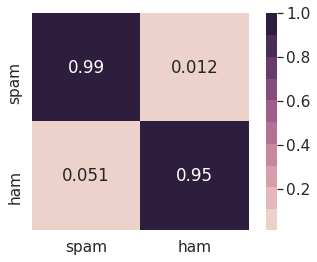

In [49]:
classifer = MultinomialNB()
classifer.fit(X_train, y_train)
y_pred = classifer.predict(X_test)
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(np.float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1, square=True, cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()
    fig.savefig('naive_bayes.eps', format='eps', dpi=300, bbox_inches='tight')
    fig.savefig('naive_bayes.png', dpi=300, bbox_inches='tight')


# Support Vector Machine

/home/support/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/support/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

        spam       0.88      1.00      0.94       979
         ham       0.00      0.00      0.00       136

    accuracy                           0.88      1115
   macro avg       0.44      0.50      0.47      1115
weighted avg       0.77      0.88      0.82      1115



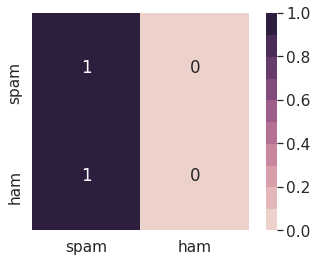

In [54]:
classifer = SVC()
classifer.fit(X_train, y_train)
y_pred = classifer.predict(X_test)
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(np.float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1, square=True, cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()
    fig.savefig('svm.eps', format='eps', dpi=300, bbox_inches='tight')
    fig.savefig('svm.png', dpi=300, bbox_inches='tight')


# Decision Trees

              precision    recall  f1-score   support

        spam       0.98      0.98      0.98       979
         ham       0.86      0.83      0.84       136

    accuracy                           0.96      1115
   macro avg       0.92      0.91      0.91      1115
weighted avg       0.96      0.96      0.96      1115



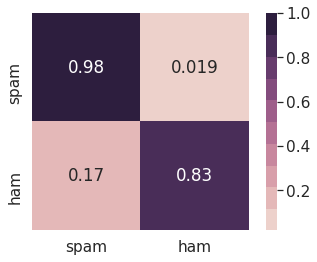

In [55]:
classifer = DecisionTreeClassifier()
classifer.fit(X_train, y_train)
y_pred = classifer.predict(X_test)
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(np.float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1, square=True, cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()
    fig.savefig('dt.eps', format='eps', dpi=300, bbox_inches='tight')
    fig.savefig('dt.png', dpi=300, bbox_inches='tight')


# Random Forest Trees

              precision    recall  f1-score   support

        spam       0.98      1.00      0.99       979
         ham       1.00      0.82      0.90       136

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.98      0.98      0.98      1115



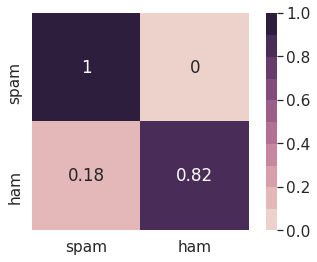

In [56]:
classifer = RandomForestClassifier(n_estimators=100)
classifer.fit(X_train, y_train)
y_pred = classifer.predict(X_test)
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(np.float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1, square=True, cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()
    fig.savefig('rft.eps', format='eps', dpi=300, bbox_inches='tight')
    fig.savefig('rft.png', dpi=300, bbox_inches='tight')


# Stochastic Gradient Descent

              precision    recall  f1-score   support

        spam       0.99      1.00      0.99       979
         ham       0.98      0.90      0.93       136

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



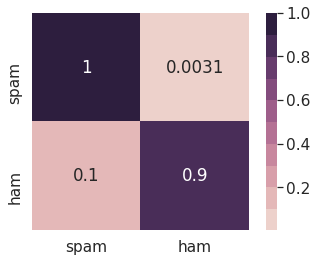

In [57]:
classifer = SGDClassifier()
classifer.fit(X_train, y_train)
y_pred = classifer.predict(X_test)
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(np.float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1, square=True, cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()
    fig.savefig('sgd.eps', format='eps', dpi=300, bbox_inches='tight')
    fig.savefig('sgd.png', dpi=300, bbox_inches='tight')


# k-N Centroid

/home/support/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/nearest_centroid.py:141: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn("Averaging for metrics other than "
/home/support/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/nearest_centroid.py:141: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn("Averaging for metrics other than "


              precision    recall  f1-score   support

        spam       0.99      0.87      0.93       979
         ham       0.50      0.92      0.65       136

    accuracy                           0.88      1115
   macro avg       0.75      0.90      0.79      1115
weighted avg       0.93      0.88      0.89      1115



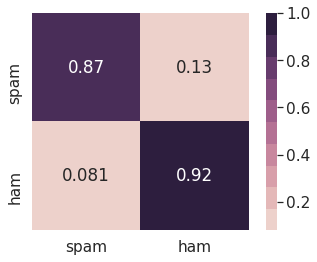

In [58]:
classifer = NearestCentroid(metric='cosine')
classifer.fit(X_train, y_train)
y_pred = classifer.predict(X_test)
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(np.float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1, square=True, cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()
    fig.savefig('knc.eps', format='eps', dpi=300, bbox_inches='tight')
    fig.savefig('knc.png', dpi=300, bbox_inches='tight')


# k-N Neigbhour

              precision    recall  f1-score   support

        spam       0.93      1.00      0.96       979
         ham       1.00      0.45      0.62       136

    accuracy                           0.93      1115
   macro avg       0.96      0.72      0.79      1115
weighted avg       0.94      0.93      0.92      1115



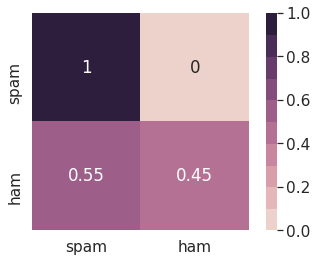

In [59]:
classifer = KNeighborsClassifier(n_neighbors=3)
classifer.fit(X_train, y_train)
y_pred = classifer.predict(X_test)
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(np.float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1, square=True, cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()
    fig.savefig('knn.eps', format='eps', dpi=300, bbox_inches='tight')
    fig.savefig('knn.png', dpi=300, bbox_inches='tight')
